# Chapter 12. Geographic Data

**Geographic data** is any data that is associated with a location on Earth. For example, the percentage of people in each state who voted for a presidential candidate is an example of geographic data, as are the locations of earthquake epicenters. In this chapter, we will discuss techniques for analyzing and visualizing geographic data.

# 12.1 Map Projections and Distance Metrics

## Longitude and Latitude

The Earth is split into Northern and Southern Hemispheres by the equator and into Eastern and Western Hemispheres by the prime meridian. Locations on the surface of the earth are specified by two angles: the **latitude** and **longitude**. The latitude measures the angle above (or below) the equator and ranges from $-90^\circ$ to $90^\circ$ (or $90^\circ$S to $90^\circ$N). The longitude measures the angle to the east or to the west of the prime meridian. It ranges from $-180^\circ$ to $180^\circ$ (or $180^\circ$W to $180^\circ$E).

So, for example, the city of New Orleans in the United States, which is in the Northern and Western Hemispheres, can be described by the longitude and latitude coordinates $(-90^\circ, 40^\circ)$.

![](latlon.jpg)

We typically use the symbol $\lambda$ to denote longitude and the symbol $\phi$ to denote latitude.

## Distance Metrics

How do we measure the distance between two points, ${\bf x}_1 = (\lambda_1, \phi_1)$ and ${\bf x}_2 = (\lambda_2, \phi_2)$, on the surface of the Earth? The obvious choice, Euclidean distance, 
$$ d({\bf x}_1, {\bf x}_2) = \sqrt{(\lambda_1 - \lambda_2)^2 + (\phi_1 - \phi_2)^2} $$
is not a good choice. To see why, consider the distance between Oslo, Norway ($10.75^\circ$, $59.91^\circ$) to Anchorage, Alaska ($-149.90^\circ$, $61.22^\circ$). Euclidean distance would say that these two cities are extremely far apart. But as you might know if you have ever taken a flight halfway around the world, the distance can be shorter if you fly over the North Pole. The shortest path between Anchorage and Oslo is shown below.

![](anc-osl.gif)

It makes sense to define the distance between two points on the surface of the Earth to be the distance of the _shortest path_ between them. On a sphere, the shortest path between any two points is the path along the _great circle_---that is, the circle passing through the two points, whose diameter matches the diameter of the sphere. Shown below is the shortest path between two points on the surface of the Earth, along with the great circle (represented by a dotted line).

![](haversine.png)

The distance along the great circle is known as **Haversine distance**. Haversine distance is calculated as 
$$ d({\bf x}_1, {\bf x}_2) = 2r \arcsin\left( \sqrt{\sin^2\left( \frac{\phi_1 - \phi_2}{2} \right) + \cos(\phi_1) \cos(\phi_2) \sin^2\left( \frac{\lambda_1 - \lambda_2}{2} \right)} \right),$$
where $r$ is the radius of the sphere. 

In [1]:
import numpy as np

# Mean radius of the earth (in km)
EARTH_RADIUS = 6371.009

def haversine(point1, point2):
    """
    Calculate the great circle distance between two points
    on the Earth, specified as (lon, lat), where lon and lat
    are in degrees.
    
    Returns: distance between points in km
    """
    # convert decimal degrees to radians
    lon1, lat1 = [np.radians(x) for x in point1]
    lon2, lat2 = [np.radians(x) for x in point2]

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    return 2 * EARTH_RADIUS * np.arcsin(np.sqrt(a))

In [2]:
oslo = (10.75, 59.91)
anchorage =  (-149.90, 61.22)
haversine(oslo, anchorage)

6444.0751212517234

## Projections

A map depicts geographic data on a flat, two-dimensional plane. The process of converting a three-dimensional surface to a two-dimensional plane is known as **projection**. There are many possible projections. Every projection distorts the surface in some way, so there is no "best" projection. The right projection depends on the situation.

One of the early map projections, developed during the Age of Exploration, was the **Mercator projection**, which is a type of _cylindrical projection_.

![](mercator.jpg)

To obtain a cylindrical projection, we first imagine rolling a flat piece of paper into a cylinder that encloses the Earth. Next, we imagine a source of light emanating from the center from the Earth, projecting each location on the surface of the earth onto the cylinder. The map is just the unrolled cylinder.

The Mercator projection is _conformal_, meaning that it preserves angles. This makes it useful for navigation. The problem with the Mercator projection is that it grossly distorts the sizes of locations near the poles. Canada, Russia, and Greenland appear much bigger than they actually are. Shown below is a comparison of the apparent sizes of Greenland and Africa in the Mercator projection and in actuality.

![](greenland-vs-africa.jpg)

There are other projections, the most notable ones being the Gall-Peters projection (a projection that preserves areas exactly) and the Robinson projection (a projection that is neither conformal nor equal-area, but a reasonable compromise between the two).

![](projections.jpg)

There are also _conic projections_. That is, locations on the surface of the earth are projected onto a cone instead of a cylinder.

![](conic.jpg)

The cone can touch the surface of the Earth at one latitude (in which case it is called a "tangent cone") or two (in which case it is called a "secant cone"). The latitudes at which the cone meets the surface of the Earth are called **reference latitudes**. Distances along the reference latitudes are preserved perfectly. A common conic projection that is used for regional maps is the **Lambert conformal conic** (LCC) projection.

For more information about map projections, read [Understanding Map Projections](http://downloads2.esri.com/support/documentation/ao_/710Understanding_Map_Projections.pdf). But let's take the projections that we know and start making maps.

# Making Maps with _cartopy_

To make maps, we use the _cartopy_ library, which plays well with _matplotlib_.

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

The LCC projection is often used to make a map of the United States. For this projection, we have to specify the central latitude and longitude, as well as the reference latitudes (a.k.a. `standard_parallels=`). A list of all of the projections available in _cartopy_ can be found [here](https://scitools.org.uk/cartopy/docs/v0.16/crs/projections.html).

Once we have chosen a projection, it's time to add features, like bodies of water and country, to our map. To request a particular feature, we use the `.natural_earth_shp()` method, which tells _cartopy_ what data it should download from [Natural Earth](https://www.naturalearthdata.com/downloads/) and how to plot it.

For example, 
```
ax.natural_earth_shp(name="lakes",
                     resolution="110m",
                     category="physical", 
                     facecolor="skyblue")
```
tells _cartopy_ to download the `lakes` data from the [1:110m resolution physical vectors](https://www.naturalearthdata.com/downloads/110m-physical-vectors/) and to color the lakes skyblue.

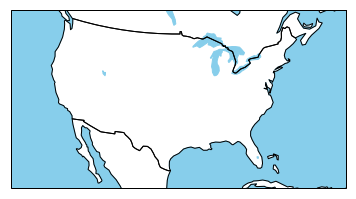

In [39]:
ax = plt.axes(
    projection=ccrs.LambertConformal(
        central_latitude=39,
        central_longitude=-96,
        standard_parallels=(33, 45)
    )
)

ax.natural_earth_shp(name="lakes",
                     resolution="110m",
                     category="physical", 
                     facecolor="skyblue")
ax.natural_earth_shp(name="ocean",
                     resolution="110m",
                     category="physical", 
                     facecolor="skyblue")

# To see that the name should be admin_0_countries, note that the URL is
# https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
ax.natural_earth_shp(name="admin_0_countries",
                     resolution="110m",
                     category="cultural", 
                     facecolor="None", edgecolor="black")

# This sets the x- and y-axes limits
ax.set_extent([-125, -66.5, 20, 50])

Natural Earth provides other data, including states, provinces, land, and coastlines. A complete list can be found [here](https://www.naturalearthdata.com/downloads/).

# Exercises

**Exercise 1.** The latitudes and longitudes of 7322 world cities are contained in `https://raw.githubusercontent.com/dlsun/data-science-book/master/data/worldcities.csv`. Find the 15 closest cities to St. Louis, as measured by Euclidean distance and Haversine distance. Do you notice any differences between the two lists?

In [ ]:
# YOUR CODE HERE

**Exercise 2.** Make a map of Europe with country borders. (You will need to fiddle with the boundaries of the plot until it looks right.) Try different projection methods to see how they differ.

In [ ]:
# YOUR CODE HERE